In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset as data
df = pd.read_json('MLandStatsDataSet.json')
print(df.head())
print(df.tail())

           login_time
0 2010-01-01 00:11:52
1 2010-01-01 00:13:00
2 2010-01-01 00:14:49
3 2010-01-01 00:21:00
4 2010-01-01 00:23:05
               login_time
97418 2010-08-28 14:38:00
97419 2010-08-28 14:38:39
97420 2010-08-28 14:44:25
97421 2010-08-28 14:45:34
97422 2010-08-28 14:47:00


In [3]:
df = df.set_index(df['login_time'])
df['ride'] = 1
df.index = pd.to_datetime(df.index)
df['month'] = pd.DatetimeIndex(df['login_time']).month
df['month_name'] = df['month'].map({1: 'JAN', 2:'FEB', 3: 'MAR', 4:'APR', 5:'MAR', 6:'JUN', 7:'JUL', 8:'AUG'})
df['week_day'] = df['login_time'].dt.weekday_name
df['day'] = df['login_time'].dt.day
df['hour'] = df['login_time'].dt.hour
df.head()

,login_time,ride,month,month_name,week_day,day,hour
login_time,,,,,,,
2010-01-01 00:11:52,2010-01-01 00:11:52,1,1,JAN,Friday,1,0
2010-01-01 00:13:00,2010-01-01 00:13:00,1,1,JAN,Friday,1,0
2010-01-01 00:14:49,2010-01-01 00:14:49,1,1,JAN,Friday,1,0
2010-01-01 00:21:00,2010-01-01 00:21:00,1,1,JAN,Friday,1,0
2010-01-01 00:23:05,2010-01-01 00:23:05,1,1,JAN,Friday,1,0


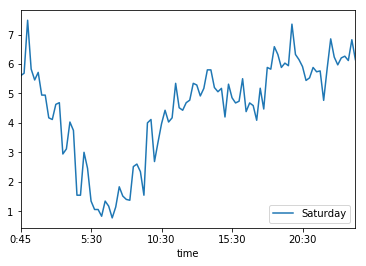

In [73]:
data_15 = df.groupby(pd.Grouper(freq = '15Min')).agg({'ride':'count'}).reset_index()
data_15['weekday'] = data_15['login_time'].dt.weekday_name
data_15['hour'] = data_15['login_time'].dt.hour
data_15['minute'] = data_15['login_time'].dt.minute
data_15['time'] = data_15['hour'].astype(str) + ':' + data_15['minute'].astype(str)
daily_analysis = data_15.groupby(['time', 'weekday']).mean().reset_index()
daily_analysis['hour'] = pd.to_numeric(daily_analysis['hour'], errors = 'coerce')
daily_analysis = daily_analysis.sort_values('hour')
one = daily_analysis[daily_analysis['weekday'] == 'Saturday']
ax = one.plot(x='time', y='ride', label = 'Saturday')

              login_time  ride weekday  day  hour  minute  time
4225 2010-02-14 00:15:00     6  Sunday   14     0      15  0:15
4226 2010-02-14 00:30:00     9  Sunday   14     0      30  0:30
4227 2010-02-14 00:45:00     7  Sunday   14     0      45  0:45
4228 2010-02-14 01:00:00     5  Sunday   14     1       0   1:0
4229 2010-02-14 01:15:00     7  Sunday   14     1      15  1:15


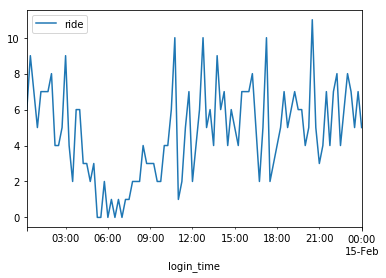

In [88]:
oneday = data_15[(data_15['login_time'] > '2010-2-14 00:00:00') & (data_15['login_time'] <= '2010-2-15 00:00:00')]
oneday.plot(x = 'login_time', y = 'ride')
print(oneday.head())

   month  count month_name
0      1  12996        JAN
1      2   9971        FEB
2      3  11457        MAR


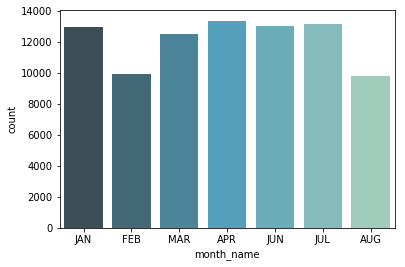

In [5]:
monthly_analysis = df.groupby('month').agg({'ride':'count'}).reset_index()
monthly_analysis['month_name'] = monthly_analysis['month'].map({1: 'JAN', 2:'FEB', 3: 'MAR', 4:'APR', 5:'MAR', 6:'JUN', 7:'JUL', 8:'AUG'})
monthly_analysis = monthly_analysis.rename(columns = {'ride':'count'})
print(monthly_analysis.head(3))
ax = sns.barplot(x = 'month_name', y = 'count', palette = "GnBu_d", data = monthly_analysis, ci=None)

   week_day  count
0    Friday  15552
1    Monday  12413
2  Saturday  14710


[Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday')]

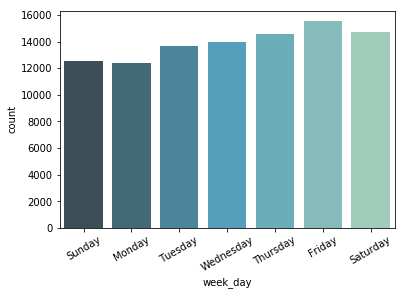

In [6]:
weekly_analysis = df.groupby('week_day').agg({'ride':'count'}).reset_index()
weekly_analysis = weekly_analysis.rename(columns = {'ride':'count'})
print(weekly_analysis.head(3))
ax = sns.barplot(x = 'week_day', y = 'count', palette = "GnBu_d", data = weekly_analysis, ci=None, order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

In [7]:
# one_day = data_interval.loc['2010-6-1']
one_day = df[df['week_day'] == 'Monday']
one_day.head()

,login_time,ride,month,month_name,week_day,day,hour
login_time,,,,,,,
2010-01-04 00:12:00,2010-01-04 00:12:00,1,1,JAN,Monday,4,0
2010-01-04 00:12:42,2010-01-04 00:12:42,1,1,JAN,Monday,4,0
2010-01-04 00:14:00,2010-01-04 00:14:00,1,1,JAN,Monday,4,0
2010-01-04 00:24:00,2010-01-04 00:24:00,1,1,JAN,Monday,4,0
2010-01-04 01:01:00,2010-01-04 01:01:00,1,1,JAN,Monday,4,1
